In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
import warnings
warnings.simplefilter("ignore")
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import seaborn as sns

In [26]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
from df2gspread import df2gspread as d2g

In [29]:
scope = ['https://spreadsheets.google.com/feeds',
 'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name(
 'my-project-data-294206-ff5dbca2c4ce.json', scopes=scope)
gc = gspread.authorize(credentials)
spreadsheet_key='1QFmo5BBjTVbl3kzZ-77eG8t2u6rthVeMi2Qy4CiPa0U'

# UC Berkeley Earth Surface Temperature Dataset
## Source: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)

In [2]:
df = pd.read_csv("Data/GlobalLandTemperaturesByCity.csv")
CO2_df = pd.read_csv('Data/archive.csv')
temp_by_city = pd.read_csv('Data/GlobalLandTemperaturesByCity.csv')
temp_by_country = pd.read_csv('Data/TemperaturesByCountry.csv')
temp_by_major_city = pd.read_csv('Data/TemperaturesByMajorCity.csv')
temp_by_state = pd.read_csv('Data/TemperaturesByState.csv')
global_temp = pd.read_csv('Data/GlobalTemperatures.csv')

In [3]:
CO2_df = CO2_df.dropna()
temp_by_city = temp_by_city.dropna()
temp_by_country = temp_by_country.dropna()
temp_by_major_city = temp_by_major_city.dropna()
temp_by_state = temp_by_state.dropna()
global_temp = global_temp.dropna()

In [4]:
CO2_df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
6,1958,7,1958.5370,315.86,315.17,315.87,315.21
7,1958,8,1958.6219,314.93,316.17,314.01,315.29



## **Dataset Size: 82,35,082**



In [5]:
temp_by_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


## **Dataset Size: 5,44,811**

In [6]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


## **Dataset Size: 2,28,175**

In [7]:
temp_by_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


## **Dataset Size: 2,28,175**


In [8]:
temp_by_state.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


## **Dataset Size:2000**

In [9]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249



<br><br>
# ARIMA Prediction of Temperature for a selected city

### We use the ARIMA prediction model to plot the range of temperatures over a year. The user selects the city and the year. 

In [10]:
# convert first column to DateTime format
df['dt'] = pd.to_datetime(df['dt'])

# set first column (dt) as the index column
df.index = df['dt']
del df['dt']

# dropping AverageTemperatureUncertainty, Latitude and Longitude and combining City and Country into City
df = df.drop({"AverageTemperatureUncertainty", "Latitude", "Longitude"}, 1)
df["City"] = df["City"] + ", " + df["Country"]
df = df.drop("Country", 1)

# removing all rows with NaN values
df = df.dropna()

# get list of all cities in dataset
cities = set(df.City)

In [11]:
# check stationarity in time series data of a given city

def check_stationarity(city_df):
    # method1: plot the time series to check for trend and seasonality
    plt.plot(city_df.index,city_df.loc[:,"AverageTemperature"])
    plt.title('Temperatures vs Years')
    plt.xlabel('Years')
    plt.ylabel('Temperatures')
    plt.show()
    
    # method 2: check if histogram fits a Gaussian Curve, then split data into two parts, calculate means and variances and see if they vary
    plt.hist(city_df.loc[:,"AverageTemperature"],bins=15)
    plt.title('Temperatures vs Frequency of Occurrences')
    plt.xlabel('Temperatures')
    plt.ylabel('Frequency of Occurrences')
    plt.show()
    
    X = city_df["AverageTemperature"].values
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))
    
    # if corresponding means and variances differ slightly (by less than 10), we consider that the time series might be stationary
    if (abs(mean1-mean2) <= 10 and abs(var1-var2) <= 10):
        print("Time Series may be Stationary, since means and variances vary only slightly.\n")
    else:
        print("Time Series may NOT be Stationary, since means and variances vary significantly.\n")
        
    # method3: statistical test (Augmented Dickey-Fuller statistic)
    print("Performing Augmented Dickey-Fuller Test to confirm stationarity...")
    
    result = adfuller(X)
   # print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    
    p = result[1]
    if (p > 0.05):
        #print("Time Series is NOT Stationary, since p-value > 0.05")
        city_df = city_df.diff()  # differencing to make data stationary
        return False
    else:
        #print("Time Series is Stationary, since p-value <= 0.05")
        return True

In [12]:
# check stationarity for data of a specific city entered by the user

city_drop_down_menu = widgets.Dropdown(
    options=sorted(list(cities)),
    value='New York, United States',
    description='City:',
    disabled=False,
)

city_drop_down_menu

Dropdown(description='City:', index=2117, options=('A Coruña, Spain', 'Aachen, Germany', 'Aalborg, Denmark', '…

In [13]:
chosen_city = city_drop_down_menu.value
city_df = df[df.City == chosen_city].drop("City", 1)

In [14]:
city_df.head()
city_df.to_csv("New York.csv")
#print(len(city_df))

In [40]:
wks_name= "Tableau"
d2g.upload(city_df, spreadsheet_key, wks_name, credentials=credentials, row_names=True)
print("Data upload success")

Data upload success


In [14]:
#city_df.to_csv("City Data.csv")

Stationarity Check for New York, United States


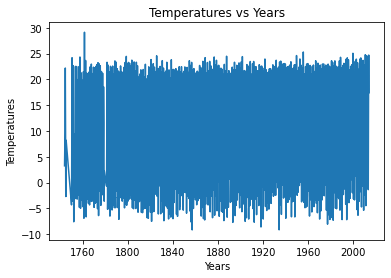

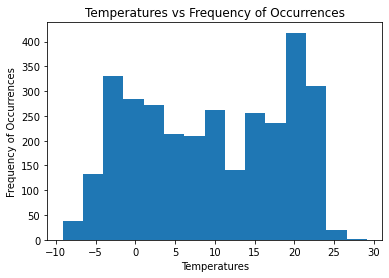

mean1=9.117772, mean2=9.928560
variance1=86.640935, variance2=84.126356
Time Series may be Stationary, since means and variances vary only slightly.

Performing Augmented Dickey-Fuller Test to confirm stationarity...
p-value: 0.000011


In [15]:
print ("Stationarity Check for %s" % chosen_city)
is_stationary = check_stationarity(city_df)

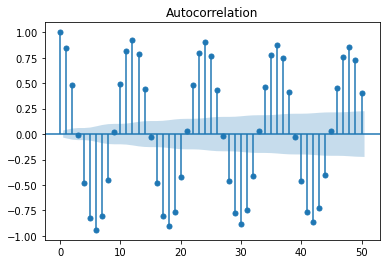

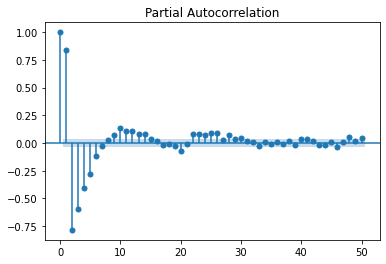

In [16]:
# ACF and PACF plots

plot_acf(city_df,lags = 50)
plot_pacf(city_df,lags = 50)
plt.show()

# setting d value for ARIMA model
if (is_stationary==True):
    d = 0
else:
    d = 1

In [17]:
# Although we can determine p, q values manually by looking at the ACF and PACF plots for a given city, we must automate the process
# To automate the process, we must perform a grid search over different values of p and q and choose the ARIMA model for which the AIC and BIC values are minimum

p_range = q_range = list(range(0,3))  # taking values from 0 to 2

aic_values = []
bic_values = []
pq_values = []

for p in p_range:
    for q in q_range:
        #print("P: ",p," Q: ",q)
        try:
            model = ARIMA(city_df, order=(p, d, q))
            #print("Model: ",model)
            results = model.fit(disp=-1)
            #print("Result: ",results)
            aic_values.append(results.aic)
            bic_values.append(results.bic)
            #print("AIC: ",aic_values,"\nBIC: ",bic_values)
            pq_values.append((p, q))
        except:
            pass

best_pq = pq_values[aic_values.index(min(aic_values))]  # (p,q) corresponding to lowest AIC score
print("(p,q) corresponding to lowest AIC score: ", best_pq)

(p,q) corresponding to lowest AIC score:  (2, 2)


In [18]:
# fitting an ARIMA model with chosen p, d, q values and calculating the mean squared error
from sklearn.metrics import mean_absolute_error

arima_model = ARIMA(city_df, order=(best_pq[0], 0, best_pq[1])).fit()
predictions = arima_model.predict(start=0, end=len(city_df)-1)

mse = mean_squared_error(list(city_df.AverageTemperature), list(predictions))
print("Mean Squared Error:", mse)

mae = mean_absolute_error(list(city_df.AverageTemperature), list(predictions))
print("Mean Absolute Error:", mae)

Mean Squared Error: 4.678030053871529
Mean Absolute Error: 1.5779972560780993


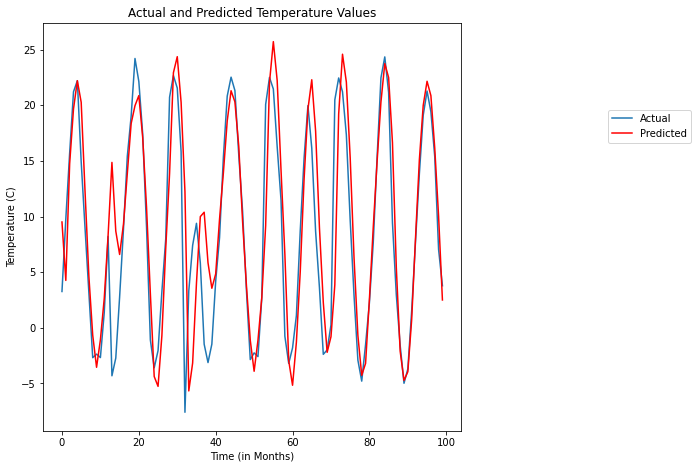

In [19]:
# comparing first 100 predictions with actual values

plt.figure(figsize=(7.5,7.5))
plt.plot(list(city_df.AverageTemperature)[:100], label="Actual")
plt.plot(list(predictions)[:100], 'r', label="Predicted")

plt.xlabel("Time (in Months)")
plt.ylabel("Temperature (C)")
plt.title("Actual and Predicted Temperature Values")

plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
plt.show()

In [27]:
print(list(city_df.index))


[Timestamp('1743-11-01 00:00:00'), Timestamp('1744-04-01 00:00:00'), Timestamp('1744-05-01 00:00:00'), Timestamp('1744-06-01 00:00:00'), Timestamp('1744-07-01 00:00:00'), Timestamp('1744-09-01 00:00:00'), Timestamp('1744-10-01 00:00:00'), Timestamp('1744-11-01 00:00:00'), Timestamp('1744-12-01 00:00:00'), Timestamp('1745-01-01 00:00:00'), Timestamp('1745-02-01 00:00:00'), Timestamp('1745-03-01 00:00:00'), Timestamp('1745-04-01 00:00:00'), Timestamp('1750-01-01 00:00:00'), Timestamp('1750-02-01 00:00:00'), Timestamp('1750-03-01 00:00:00'), Timestamp('1750-04-01 00:00:00'), Timestamp('1750-05-01 00:00:00'), Timestamp('1750-06-01 00:00:00'), Timestamp('1750-07-01 00:00:00'), Timestamp('1750-08-01 00:00:00'), Timestamp('1750-09-01 00:00:00'), Timestamp('1750-10-01 00:00:00'), Timestamp('1750-12-01 00:00:00'), Timestamp('1751-01-01 00:00:00'), Timestamp('1751-02-01 00:00:00'), Timestamp('1751-03-01 00:00:00'), Timestamp('1751-04-01 00:00:00'), Timestamp('1751-06-01 00:00:00'), Timestamp('17

In [20]:
predicted = pd.DataFrame()
predicted["Date"] = list(city_df.index)
predicted["Actual"] = list(city_df.AverageTemperature)
predicted["Predicted"] = list(predictions)
predicted.to_csv("Pred_Temp.csv")

In [21]:
# drop-down menu to select number of years for which predictions are required

years_drop_down_menu = widgets.Dropdown(
    options=list(range(1,201)),
    value=10,
    description='No. of Years:',
    disabled=False,
)

years_drop_down_menu

Dropdown(description='No. of Years:', index=9, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…

In [22]:
num_years = years_drop_down_menu.value
last_month_in_dataset = city_df.index[-1].month  # gets last month in city_df
remaining_months = 12 - last_month_in_dataset  # months left in current year for that city's data
number_of_steps = remaining_months + num_years * 12  # number of steps to make out-of-sample predictions

out_of_sample_forecast = arima_model.forecast(steps=number_of_steps)[0]  # predictions

out_of_sample_forecast = out_of_sample_forecast[remaining_months:]  # excluding predictions for remaining months in current year

In [31]:
print(out_of_sample_forecast)

[-3.8075938  -2.25059653  2.4620484   9.02735601 15.65598121 20.55970776
 22.43367335 20.80334044 16.14401965  9.74302719  3.34426736 -1.32669934
 -3.02780947 -1.33053079  3.27284999  9.51135244 15.68597569 20.13223036
 21.66865799 19.91052632 15.36547626  9.2875454   3.33139236 -0.89799836
 -2.2776347  -0.46445586  4.02008751  9.93945056 15.68273398 19.70291128
 20.93337274 19.07067545 14.64861004  8.88573327  3.34978765 -0.46863141
 -1.5572665   0.34968803  4.70749912 10.31604171 15.65010976 19.27403278
 20.22792893 18.28172028 13.98975433  8.53333011  3.39575352 -0.04074517
 -0.86673544  1.11397317  5.33867967 10.64525845 15.59165332 18.8476114
 19.55228116 17.5415867  13.38538623  8.22632903  3.46588459  0.3837687
 -0.20592474  1.83047285  5.91707999 10.93098446 15.51062951 18.425419
 18.90624563 16.84820472 12.83212702  7.96096702  3.55705223  0.80325323
  0.42541219  2.50125132  6.44600681 11.17686462 15.41003496 18.00900241
 18.28951703 16.19951806 12.32674176  7.73371486  3.666

In [23]:
# displaying forecasted values for the nth year

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
i = 0
for x in out_of_sample_forecast[-12:]:  # last year
    print(months[i]+": ", x, 'C')
    i += 1

January:  2.1466621975593982 C
February:  4.259586605285342 C
March:  7.766871651635599 C
April:  11.708505915555236 C
May:  15.01711174133896 C
June:  16.806882214231983 C
July:  16.610613595810836 C
August:  14.501439637652767 C
September:  11.067612108885411 C
October:  7.248623632478553 C
November:  4.0782769865257755 C
December:  2.4049352482672064 C


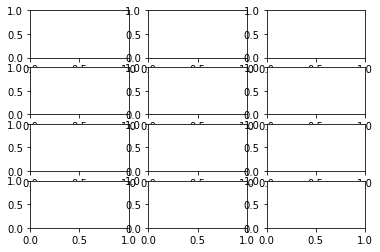

In [24]:
# plotting monthly temperature changes from 2013 to 2013+n years

fig, ax = plt.subplots(nrows=4, ncols=3)

monthly_change = {}

for month in range(12):
    temp = month
    for year in range(num_years):
        if month not in monthly_change:
            monthly_change[month] = [out_of_sample_forecast[temp]]
        else:
            monthly_change[month].append(out_of_sample_forecast[temp])
        temp+=12

In [25]:
# plotting the predicted values for the nth year

trace = go.Scatter(
    x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    y = out_of_sample_forecast[-12:],
    mode = 'lines',
    name = 'Average Temperature'
)

layout = go.Layout(
    title='Predicted Temperatures for the Year %d' % (2013+num_years),
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Temperature (C)',
    )
)
data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

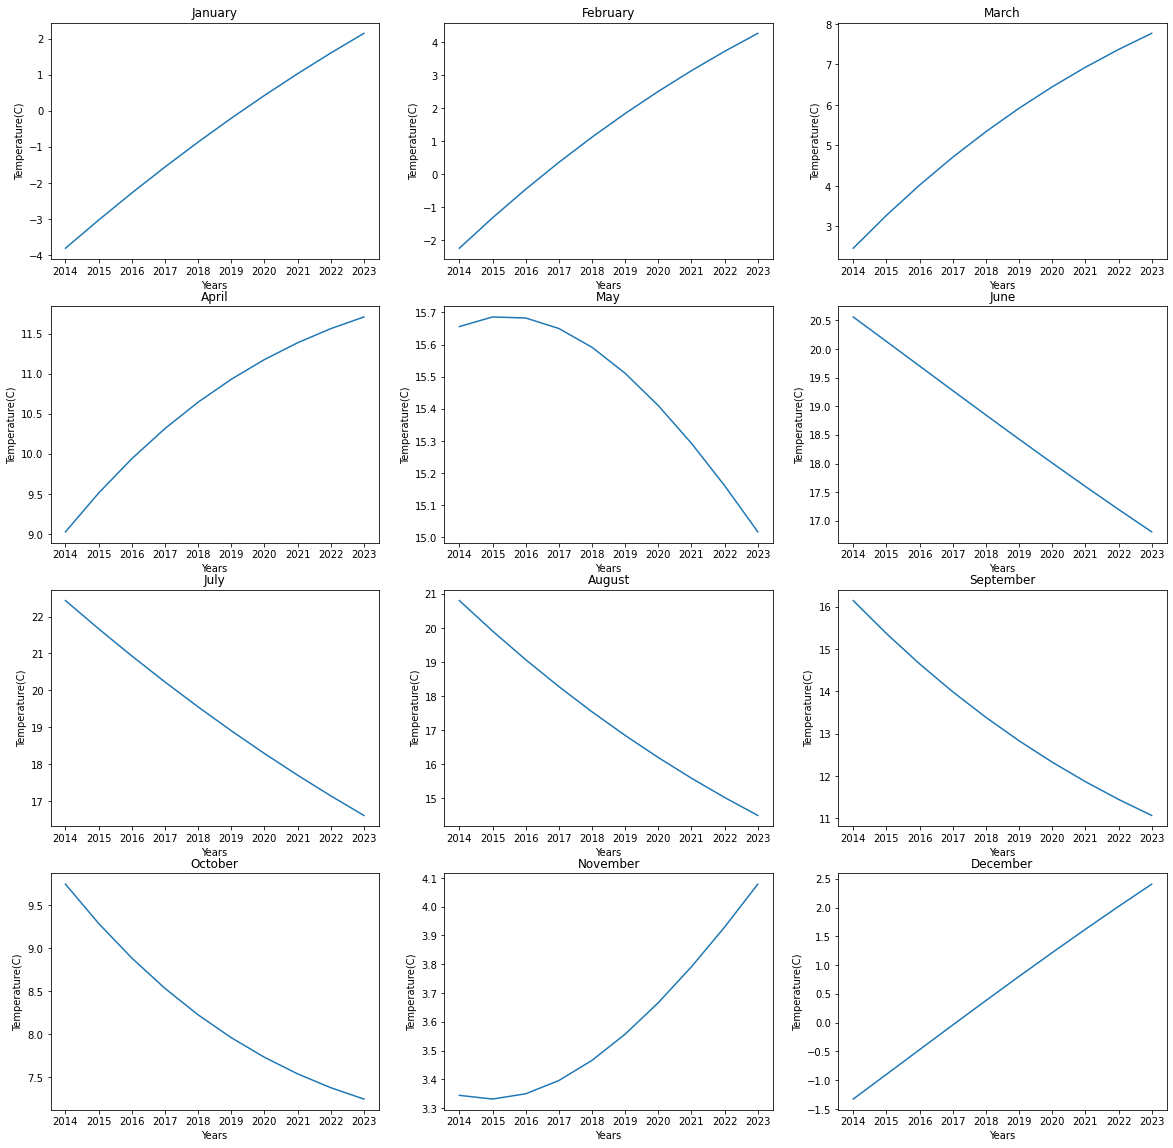

In [26]:
plt.figure(figsize=(20,20))
for pos in range(0,12):
    plt.subplot(4,3,pos+1)
    plt.plot(monthly_change[pos])
    plt.xticks(np.array(range(num_years)), [i for i in range(2014,2014+num_years)])
    plt.title(months[pos])
    plt.xlabel('Years')
    plt.ylabel('Temperature(C)')

plt.show()



## Top-10 Cities in the US with Maximum Temperature Change

In [27]:
# read the csv file into a DataFrame
df = pd.read_csv("Data/GlobalLandTemperaturesByCity.csv")

# convert first column to DateTime format
df['dt'] = pd.to_datetime(df['dt'])

# set first column (dt) as the index column
df.index = df['dt']
del df['dt']
df = df.drop({"AverageTemperatureUncertainty"}, 1)
df = df.dropna()

# while estimating top 10 US cities using the whole data, we got multiple cities with identical latitude and longitude values, making plotting difficult
# therefore, we only consider US cities with unique latitude and longitude values

# getting the first city for each unique latitude-Longitude pair
new_us_cities_df = df[df.Country=='United States'].drop('Country', 1)
new_us_cities_df['latlon'] = new_us_cities_df['Latitude'] + ', ' + new_us_cities_df['Longitude']
new_us_cities_df = new_us_cities_df.sort_values('latlon')
unique_latlon_values = set(list(new_us_cities_df.latlon))

cities = list(new_us_cities_df.City)

unique_latlon_first_cities = []

for x in unique_latlon_values:
    i = list(new_us_cities_df.latlon).index(x)
    unique_latlon_first_cities.append(cities[i])

part_2_df = df[df['City'].isin(unique_latlon_first_cities)].drop(['Country', 'Latitude', 'Longitude'], 1)
part_2_df.head()

,AverageTemperature,City
dt,,
1820-01-01,2.101,Abilene
1820-02-01,6.926,Abilene
1820-03-01,10.767,Abilene
1820-04-01,17.989,Abilene
1820-05-01,21.809,Abilene


In [28]:
# hide warnings
import warnings
warnings.simplefilter("ignore")

changes = []  # stores temperature change for cities
avg_2013 = []  # stores average of 2013 temperature for each city
avg_2023 = []  # stores average of 2023 temperature for each city

for each_city in set(unique_latlon_first_cities):
    new_city_df = part_2_df[part_2_df.City == each_city].drop("City", 1)  # new df for each city
    new_city_df_mean = new_city_df.resample("A").mean()  # stores yearly mean temperature values for city
    new_city_df_mean = new_city_df_mean.dropna()
    last_year_average = new_city_df_mean['AverageTemperature'][-1]  # average of last year temperature for comparison later
    avg_2013.append(last_year_average)
    
    # making predictions for city for next 10 years
    p_range = q_range = [i for i in range(0,3)]  # taking values from 0 to 2

    aic_values = []
    bic_values = []
    pq_values = []

    for p in p_range:
        for q in q_range:
            try:
                model = ARIMA(new_city_df, order=(p, 0, q))
                results = model.fit(disp=-1)
                aic_values.append(results.aic)
                bic_values.append(results.bic)
                pq_values.append((p, q))
            except:
                pass
    
    best_pq = pq_values[aic_values.index(min(aic_values))]  # (p,q) corresponding to lowest AIC score
    
    arima_model = ARIMA(new_city_df, order=(best_pq[0], 0, best_pq[1])).fit()
    
    # make prediction for next 10 years using 120 steps
    out_of_sample_forecast = arima_model.forecast(steps=120)[0]
    average_after_10_years = np.mean(out_of_sample_forecast[-9:])  # average of 10th year's values (after 10 years) i.e. average of last 9 values (Jan-Sep because 2013 values end at September)
    avg_2023.append(average_after_10_years)
    
    changes.append(abs(last_year_average - average_after_10_years))
    
    top_10_changes_indices = sorted(range(len(changes)), key=lambda i: changes[i], reverse=True)[:10]
    top_10_cities = [unique_latlon_first_cities[x] for x in top_10_changes_indices]
    top_10_cities

In [29]:
# plotting the top-10 cities using plotly

top10_df = pd.DataFrame()
top10_df['city'] = top_10_cities
top10_df['latitude'] = [new_us_cities_df.Latitude[new_us_cities_df.City==x][-1] for x in top_10_cities]
top10_df['longitude'] = [new_us_cities_df.Longitude[new_us_cities_df.City==x][-1] for x in top_10_cities]
top10_df['2013_average'] = [avg_2013[x] for x in top_10_changes_indices]
top10_df['2023_average'] = [avg_2023[x] for x in top_10_changes_indices]
top10_df['change'] =  [changes[x] for x in top_10_changes_indices]
top10_df = top10_df.round({'2013_average':2, '2023_average':2, 'change':2})
top10_df['text'] = top10_df['city'] + ', Avg. Temperature in 2013: ' + top10_df['2013_average'].astype(str) + 'C, Avg. Temperature in 2023: ' + top10_df['2023_average'].astype(str) +'C'

# convert latitude and longitude to numeric values for plotting i.e. remove 'N' and 'W' from values and also make longitudes negative
top10_df['latitude'] = [float(x[:-1]) for x in list(top10_df['latitude'])]
top10_df['longitude'] = [-float(x[:-1]) for x in list(top10_df['longitude'])]

scl = [ [0,"rgb(172, 5, 5)"],[0.35,"rgb(190, 40, 40)"],[0.5,"rgb(245, 70, 70)"],[0.6,"rgb(245, 89, 89)"],[0.7,"rgb(247, 106, 106)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = top10_df['longitude'],
        lat = top10_df['latitude'],
        text = top10_df['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = top10_df['change'],
            cmax = top10_df['change'].max(),
            colorbar=dict(
                title="Temperature Change"
            )
        ))]

layout = dict(
        title = 'Top 10 Cities with most Temperature Change in 10 Years<br><i>Hover for Details</i>',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict(data=data, layout=layout)
iplot(fig, validate=False, filename='top-10-cities')

In [9]:
print(top10_df)
top10_df.to_csv("Top10.csv")

               city  latitude  longitude  2013_average  2023_average  change  \
0       Little Rock     34.56     -91.46         17.88         14.42    3.46   
1           Memphis     34.56     -89.51         19.53         16.20    3.33   
2       Springfield     42.59     -72.00         18.68         15.81    2.86   
3           Salinas     36.17    -121.33          1.02         -1.73    2.75   
4      Indianapolis     39.38     -85.32         10.95          8.41    2.54   
5      Nuevo Laredo     28.13     -99.09         13.13         10.78    2.35   
6         Milwaukee     42.59     -87.27         18.74         16.52    2.22   
7  Huntington Beach     32.95    -117.77         20.54         18.39    2.14   
8           Wichita     37.78     -97.63         16.05         14.00    2.05   
9         Green Bay     44.20     -87.20         15.02         13.26    1.77   

                                                text  
0  Little Rock, Avg. Temperature in 2013: 17.88C,...  
1  Memphi


<br><br>
# Pollution and Temperature Change
## Part  1: Analysing the 3 main greenhouse gasses

### Source: https://www.kaggle.com/sogun3/uspollution/data

In [2]:
df = pd.read_csv('Data/pollution_us_2000_2016.csv')
new_df = df.drop(['Unnamed: 0','State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour','CO Units', 'CO Mean','CO 1st Max Value', 'CO 1st Max Hour'],axis = 1)

In [3]:
#Data Cleaning : 
#-----------------------------------------------------------------------------------------------------------------#

# For NO2

# Get only the NO2 AQI values and Date Local
no2_df = new_df.drop(['O3 AQI', 'SO2 AQI', 'CO AQI'],1)

# Every day has multiple values, so we will take only the maximum values of NO2 AQI every day
no2_df = no2_df.sort_values('NO2 AQI', ascending = 0).drop_duplicates(subset='Date Local', keep='first')

# Convert Date Local to datatime format
no2_df['Date Local'] = pd.to_datetime(no2_df['Date Local'])
no2_df.index = no2_df['Date Local']
del no2_df['Date Local']

# Consider only New York City
no2_df = no2_df[no2_df['City'] == 'New York']

# Calculate mean N02 AQI per year
no2_df = no2_df.resample("A").mean()
no2_df= no2_df.sort_index()
no2_df = no2_df.dropna()

#-----------------------------------------------------------------------------------------------------------------#

# For SO2
so2_df = new_df.drop(['O3 AQI', 'NO2 AQI', 'CO AQI'],1)
so2_df = so2_df.sort_values('SO2 AQI',ascending = 0).drop_duplicates(subset='Date Local', keep='first')
so2_df['Date Local'] = pd.to_datetime(so2_df['Date Local'])
so2_df.index = so2_df['Date Local']
del so2_df['Date Local']
so2_df = so2_df[so2_df['City'] == 'New York']
so2_df = so2_df.resample("A").mean()
so2_df= so2_df.sort_index()
so2_df = so2_df.dropna()
so2_df.head()

#-----------------------------------------------------------------------------------------------------------------#

# For CO
co_df = new_df.drop(['SO2 AQI', 'NO2 AQI', 'O3 AQI'],1)
co_df = co_df.sort_values('CO AQI',ascending = 0).drop_duplicates(subset='Date Local', keep='first')
co_df['Date Local'] = pd.to_datetime(co_df['Date Local'])
co_df.index = co_df['Date Local']
del co_df['Date Local']
co_df = co_df[co_df['City'] == 'New York']
co_df = co_df.resample("A").mean()
co_df= co_df.sort_index()
co_df = co_df.dropna()


In [4]:
# Data Cleaning for Temperature Data where we are only considering the Temperature for New York City
df = pd.read_csv("Data/GlobalLandTemperaturesByCity.csv")
df = df[df['Country'] == 'United States']
df = df[df['City'] == 'New York']
df = df.drop({"AverageTemperatureUncertainty", "Latitude", "Longitude"}, 1)

# Convert the Date Local column to date time format
df['Date Local'] = pd.to_datetime(df['dt'])
# set first column (dt) as the index column
df.index = df['Date Local']
del df['dt'],df['City'],df['Country']
df.dropna()

# As we have only one value per day we dont need to drop duplicates so this will calculate the Annual Mean Temperature
df = df.resample("A").mean()

df = df.dropna()
df = df.sort_index()

In [5]:
# Joining different Pollution Data with the Temperature Data

j1 = pd.merge(df, no2_df, left_index = True, right_index = True, how='inner')
j2 = pd.merge(so2_df, j1, left_index = True, right_index = True, how='inner')
j3 = pd.merge(co_df, j2, left_index = True, right_index = True, how='inner')
j3.head()

,CO AQI,SO2 AQI,AverageTemperature,NO2 AQI
Date Local,,,,
2000-12-31,30.250000,62.476190,9.969083,70.000000
2001-12-31,19.000000,61.285714,10.931000,75.735294
2002-12-31,17.625000,59.342105,11.252167,71.692308
2003-12-31,19.357143,59.388889,9.836000,66.148148
2004-12-31,15.538462,53.675676,10.389500,64.921053


In [6]:
# Normalize the data so that all the column data can be compared
j3_norm = (j3 - j3.mean()) / (j3.max() - j3.min())
j3_norm.head()

,CO AQI,SO2 AQI,AverageTemperature,NO2 AQI
Date Local,,,,
2000-12-31,0.654585,0.357917,-0.404637,0.347543
2001-12-31,0.132401,0.329215,0.008577,0.575799
2002-12-31,0.068578,0.282354,0.146542,0.414894
2003-12-31,0.148978,0.283482,-0.461806,0.194245
2004-12-31,-0.028272,0.145735,-0.224037,0.145408


In [7]:
# Plotting the data
trace0 = go.Scatter(
    x = j3_norm.index,
    y = j3_norm['AverageTemperature'],
    mode = 'lines',
    name = 'Temperature'
)

trace1 = go.Scatter(
    x = j3_norm.index,
    y = j3_norm['CO AQI'],
    mode = 'lines',
    name = 'Carbon Monoxide'
)

trace3 = go.Scatter(
    x = j3_norm.index,
    y = j3_norm['SO2 AQI'],
    mode = 'lines',
    name = 'Sulphur Dioxide'
)

trace4 = go.Scatter(
    x = j3_norm.index,
    y = j3_norm['NO2 AQI'],
    mode = 'lines',
    name = 'Nitrogen Dioxide'
)

layout = go.Layout(
    title='Temperature and Pollution Plots',
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Normalized Values',
    )
)

data = [trace0,trace1,trace3,trace4]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

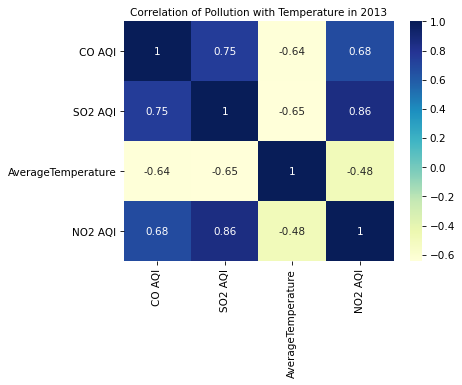

In [39]:
# Plotting the correlation matrix for Pollution vs. Temperature

fig = plt.figure(dpi = 75)

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8]) 
sns.heatmap(j3_norm.corr(method='pearson'), annot = True, cmap="YlGnBu")
ax.set_title("Correlation of Pollution with Temperature in 2013", fontsize=10)
plt.show()

#### We see that of the 3 gases analysed here (CO,SO2,NO2), SO2 has the greatest effect on the Average Temperature followed by CO and NO2

## Greenhouse Gases and Temperature Change (9000 rows)
### Part 2: CO2 vs Methane vs N20 vs HCFC

https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions

In [8]:
df = pd.read_csv("Data/GlobalLandTemperaturesByCity.csv")

# convert first column to DateTime format
df['dt'] = pd.to_datetime(df['dt'])

# set first column (dt) as the index column
df.index = df['dt']
del df['dt']

df = df.drop({"AverageTemperatureUncertainty", "Latitude", "Longitude","Country"}, 1)

df = df.dropna()

df = df[df['City']=='New York']
df = df.drop({'City'},1)
df = df.resample("A").mean()

In [9]:
gg_df = pd.read_csv("Data/greenhouse_gas_inventory_data_data.csv")

df_usa = gg_df[gg_df['country_or_area']=='United States of America'].drop('country_or_area', 1)

# getting yearly emissions for the 4 major greenhouse gases i.e. CO2, Methane, Nitrous Oxide and HCFCs
df_usa_co2 = df_usa[df_usa['category']=='carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'].drop('category', 1)
df_usa_co2 = df_usa_co2.sort_values('year')
df_usa_co2.columns=['year','co2']

df_usa_methane = df_usa[df_usa['category']=='methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'].drop('category', 1)
df_usa_methane = df_usa_methane.sort_values('year')
df_usa_methane.columns=['year','methane']

df_usa_n2o = df_usa[df_usa['category']=='nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'].drop('category', 1)
df_usa_n2o = df_usa_n2o.sort_values('year')
df_usa_n2o.columns=['year','n2o']

df_usa_hcfc = df_usa[df_usa['category']=='hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent'].drop('category', 1)
df_usa_hcfc = df_usa_hcfc.sort_values('year')
df_usa_hcfc.columns=['year','hcfc']

# Set Index
df_usa_co2.index = df_usa_co2['year']
df_usa_methane.index = df_usa_methane['year']
df_usa_n2o.index = df_usa_n2o['year']
df_usa_hcfc.index = df_usa_hcfc['year']

del df_usa_co2['year'],df_usa_methane['year'],df_usa_n2o['year'],df_usa_hcfc['year']

In [10]:
co2 = df_usa_co2['co2']
n2o = df_usa_n2o['n2o']
methane = df_usa_methane['methane']
hcfc = df_usa_hcfc['hcfc']
temp = list(df['AverageTemperature'])[-25:]

part3 = pd.DataFrame({'co2':co2,'n2o':n2o,'methane':methane,'hcfc':hcfc,'temp': temp},columns = ['co2','n2o','methane','hcfc','temp'])
part3.head()

,co2,n2o,methane,hcfc,temp
year,,,,,
1990,5.115095e+06,406228.526626,773854.896420,46288.814184,9.661333
1991,5.064880e+06,396113.656867,777034.220915,41618.413588,11.322500
1992,5.170274e+06,404052.107073,776869.789752,47427.662176,11.357250
1993,5.284759e+06,420503.190940,764089.671267,47500.262267,9.572667
1994,5.377492e+06,402478.930460,770450.426146,53246.654974,10.040917


In [11]:
# normalizing the values

part3_norm = (part3 - part3.mean()) / (part3.max() - part3.min())

In [12]:
# Plotting values for Greenhouse Gases along with Temperature (NOT NORMALISED)

trace0 = go.Scatter(
    x = part3.index,
    y = part3['temp'],
    mode = 'lines',
    name = 'Temperature'
)

trace1 = go.Scatter(
    x = part3.index,
    y = part3['co2'],
    mode = 'lines',
    name = 'Carbon Dioxide'
)

trace2 = go.Scatter(
    x = part3.index,
    y = part3['n2o'],
    mode = 'lines',
    name = 'Nitrous Oxide'
)



layout = go.Layout(
    title='Temperature and Greenhouse Gases Plots',
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Kilo Tonnes',
    )
)

data = [trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [13]:
# Plotting values for Greenhouse Gases along with Temperature

trace0 = go.Scatter(
    x = part3_norm.index,
    y = part3_norm['temp'],
    mode = 'lines',
    name = 'Temperature'
)

trace1 = go.Scatter(
    x = part3_norm.index,
    y = part3_norm['co2'],
    mode = 'lines',
    name = 'Carbon Dioxide'
)

trace2 = go.Scatter(
    x = part3_norm.index,
    y = part3_norm['n2o'],
    mode = 'lines',
    name = 'Nitrous Oxide'
)



layout = go.Layout(
    title='Temperature and Greenhouse Gases Plots',
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Normalized Values',
    )
)

data = [trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [17]:
#print(part3_norm)

greenhouse = pd.DataFrame()
greenhouse["Year"] = list(part3_norm.index)
greenhouse["CO2"] = list(part3_norm.co2)
greenhouse["N2O"] = list(part3_norm.n2o)
greenhouse["Methane"] = list(part3_norm.methane)
greenhouse["HCFC"] = list(part3_norm.hcfc)
greenhouse["Temp"] = list(part3_norm.temp)
greenhouse.to_csv("greenhouse_plot.csv")

### We see that N2O actually has an great correalation with temperature. Spikes in N2O levels are immediately followed by drastic increase in temperature.

### CO2 consistently produces higher temperatures. We see a dip in the CO2 levels after 2007-2008 with the passing of major CO2 regulation in Europe and around the world) 

In [45]:
trace0 = go.Scatter(
    x = part3_norm.index,
    y = part3_norm['temp'],
    mode = 'lines',
    name = 'Temperature'
)

trace3 = go.Scatter(
    x = part3_norm.index,
    y = part3_norm['methane'],
    mode = 'lines',
    name = 'Methane'
)

trace4 = go.Scatter(
    x = part3_norm.index,
    y = part3_norm['hcfc'],
    mode = 'lines',
    name = 'Hydrofluorocarbon'
)

layout = go.Layout(
    title='Temperature and Greenhouse Gases Plots',
    xaxis=dict(
        title='Years',
    ),
    yaxis=dict(
        title='Normalized Values',
    )
)

data = [trace0,trace3,trace4]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Increased levels of HCFC directly correlates to higher Global average temperatures.

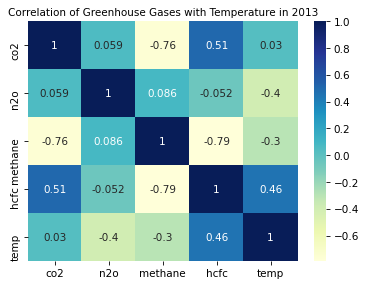

In [101]:
# Plotting the correlation matrix for the Greenhouse Gases

fig = plt.figure(dpi = 75)

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8]) 
sns.heatmap(part3.corr(method='pearson'), annot = True, cmap="YlGnBu")
ax.set_title("Correlation of Greenhouse Gases with Temperature in 2013", fontsize=10)
plt.show()

**Analysis:** From the above correlation matrix, we can infer that HCFCs (HydroChloroFluoroCarbons) have the most impact on temperature.<br>

## We now predict the future Greenhouse Gas emissions and their impact on future temperature values from 2013-2023.

In [49]:
l = [df_usa_methane, df_usa_hcfc, df_usa_n2o, df_usa_co2]

future_values = []


# Calculating AIC and BIC values for all Greenhouse Gases
for gas in l:

    p_range = q_range = list(range(0,3))  # taking values from 0 to 2
    
    # Directly converting the index of gas dataframe changes it to become a DateTimeIndex so we converted and saved it to a temporary dataframe
    temp = pd.to_datetime(gas.index,format = '%Y')
    gas['year'] = temp
    gas.set_index('year',inplace=True)
    
    aic_values = []
    bic_values = []
    pq_values = []
    
    for p in p_range:
        for q in q_range:
            try:
                model = ARIMA(gas, order=(p, 0, q))
                results = model.fit(disp=-1)
                aic_values.append(results.aic)
                bic_values.append(results.bic)
                pq_values.append((p, q))
            except:
                pass

    #print("AIC Final: ",aic_values)
    #print("BIC Final: ",bic_values)

    # (p,q) corresponding to lowest AIC score
    best_pq = pq_values[aic_values.index(min(aic_values))]  

    arima_model = ARIMA(gas, order=(best_pq[0], 0, best_pq[1])).fit()
    out_of_sample_forecast = arima_model.forecast(steps=10)[0]
   
    for i in out_of_sample_forecast:
        future_values.append(i)

# Separating and storing them in different lists which will then be converted to a dataframe
future_methane = future_values[:10]
future_co2 = future_values[30:40]
future_hcfc = future_values[10:20]

# Data Frame that stores predicted Greenhouse gas values
future_gg = pd.DataFrame({'Methane':future_methane,'CO2':future_co2,'HCFC':future_hcfc},columns = ['Methane','CO2','HCFC'])
future_gg.head()

,Methane,CO2,HCFC
0,735887.718594,5.566014e+06,156681.362129
1,738595.348114,5.575096e+06,158299.105184
2,740020.982898,5.583340e+06,157875.121459
3,740752.136284,5.590823e+06,156032.579086
4,741110.704425,5.597615e+06,153248.733087


In [50]:
# Predicting future annual temperature values across the next 10 years for New York

ny_df = pd.read_csv("Data/GlobalLandTemperaturesByCity.csv")
ny_df = ny_df[ny_df['Country'] == 'United States']
ny_df = ny_df[ny_df['City'] == 'New York']
ny_df = ny_df.drop({"AverageTemperatureUncertainty", "Latitude", "Longitude"}, 1)

# Convert the Date Local column to date time format
ny_df['Date Local'] = pd.to_datetime(ny_df['dt'])
# set first column (dt) as the index column
ny_df.index = ny_df['Date Local']
del ny_df['dt'], ny_df['City'], ny_df['Country']
ny_df.dropna()

# As we have only one value per day we dont need to drop duplicates so this will calculate the Annual Mean Temperature
ny_df = ny_df.resample("A").mean()

ny_df = ny_df.dropna()
ny_df = ny_df.sort_index()


# fitting an ARIMA model

p_range = q_range = list(range(0,3))  # taking values from 0 to 2

aic_values = []
bic_values = []
pq_values = []

for p in p_range:
    for q in q_range:
        try:
            model = ARIMA(ny_df, order=(p, 0, q))
            results = model.fit(disp=-1)
            aic_values.append(results.aic)
            bic_values.append(results.bic)
            pq_values.append((p, q))
        except:
            pass


best_pq = pq_values[aic_values.index(min(aic_values))]  # (p,q) corresponding to lowest AIC score
print("(p,q) corresponding to lowest AIC score: ", best_pq)

arima_model = ARIMA(ny_df, order=(best_pq[0], 0, best_pq[1])).fit()

ny_out_of_sample_forecast = arima_model.forecast(steps=10)[0]

future_gg['Temperature'] = ny_out_of_sample_forecast

(p,q) corresponding to lowest AIC score:  (2, 1)


In [51]:
arima_model = ARIMA(ny_df,order=(1,0,1))
arima_fit = arima_model.fit()
print(arima_fit.aic)
print(arima_fit.bic)

836.3518136762286
850.6857989113554


In [52]:
# Normalizing the predicted values

part3_norm = (future_gg - future_gg.mean()) / (future_gg.max() - future_gg.min())
part3_norm.head()

,Methane,CO2,HCFC,Temperature
0,-0.807998,-0.563784,0.311482,-0.338747
1,-0.311579,-0.405083,0.381036,0.623570
2,-0.050202,-0.261038,0.362807,0.283784
3,0.083848,-0.130296,0.283588,0.229080
4,0.149588,-0.011628,0.163899,0.114531


In [53]:
# Plotting predicted values for Greenhouse Gases with predicted temperature values for New York

future_years = ['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']
trace0 = go.Scatter(
    x = future_years,
    y = part3_norm['Methane'],
    mode = 'lines',
    name = 'Methane'
)

trace1 = go.Scatter(
    x = future_years,
    y = part3_norm['HCFC'],
    mode = 'lines',
    name = 'HCFC'
)


trace2 = go.Scatter(
    x = future_years,
    y = part3_norm['CO2'],
    mode = 'lines',
    name = 'CO2'
)

trace3 = go.Scatter(
    x = future_years,
    y = part3_norm['Temperature'],
    mode = 'lines',
    name = 'Temperature'
)


layout = go.Layout(
    title='Predicted Temperature and Greenhouse Gases Plots',
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Normalized Values',
    )
)

data = [trace0,trace1,trace3]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Analysis:** Here it can be clearly seen that there is a large correlation between HCFC levels and the global average temperature.

## We also see methane levels plateau as it is naturally produced by animals and decomposition in the soil.

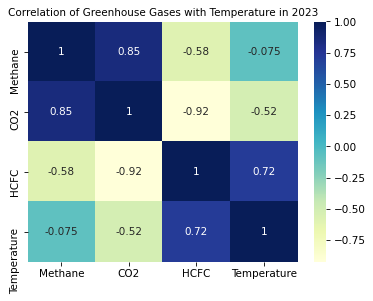

In [54]:
# Plotting the correlation matrix for the Greenhouse Gases with Temperature

fig = plt.figure(dpi = 75)

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8]) 
sns.heatmap(part3_norm.corr(method='pearson'), annot = True, cmap="YlGnBu")
ax.set_title("Correlation of Greenhouse Gases with Temperature in 2023", fontsize=10)
plt.show()

## Temperature Predictions

In [69]:
df = pd.read_csv("Data/GlobalLandTemperaturesByCity.csv")
CO2_df = pd.read_csv('Data/archive.csv')
temp_by_city = pd.read_csv('Data/GlobalLandTemperaturesByCity.csv')
temp_by_country = pd.read_csv('Data/TemperaturesByCountry.csv')
temp_by_major_city = pd.read_csv('Data/TemperaturesByMajorCity.csv')
temp_by_state = pd.read_csv('Data/TemperaturesByState.csv')
global_temp = pd.read_csv('Data/GlobalTemperatures.csv')

In [70]:
CO2_df = CO2_df.dropna()
temp_by_city = temp_by_city.dropna()
temp_by_country = temp_by_country.dropna()
temp_by_major_city = temp_by_major_city.dropna()
temp_by_state = temp_by_state.dropna()
global_temp = global_temp.dropna()

In [61]:
def to_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)
 
    

temp_by_state['year'] = temp_by_state['dt'].apply(to_year)

dfs = temp_by_state[temp_by_state['Country'] == 'United States']

# Collecting the average temperature per year 
dfa = pd.DataFrame()
years = dfs['year'].unique()
for i in years:
    df_avg = dfs[dfs['year'] == i]['AverageTemperature'].mean()
    df_new = (dfs[dfs['year'] == i]).head(1)
    df_new['AverageTemperature'] = df_avg
    dfa = dfa.append(df_new)

## Average Temperatures taken over 1,70,716 rows

In [62]:
print(dfa)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
7458    1743-11-01            4.544966                          2.898   
7463    1744-04-01           12.837651                          2.902   
7472    1745-01-01            2.649112                          2.838   
7532    1750-01-01           11.339737                          2.724   
7544    1751-01-01           12.039267                          2.847   
...            ...                 ...                            ...   
10652   2010-01-01           11.732877                          0.172   
10664   2011-01-01           11.811093                          0.242   
10676   2012-01-01           12.761842                          0.303   
10688   2013-01-01           13.077626                          0.241   
170716  1780-01-01           10.138475                          4.771   

           State        Country  year  
7458     Alabama  United States  1743  
7463     Alabama  United States  1744  
747

### Average Temperatures above 9 Degrees

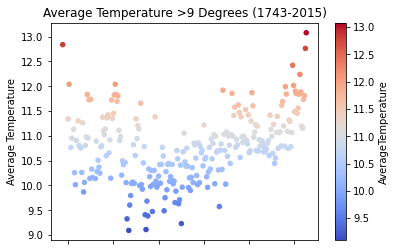

In [63]:
# Average Temperature above 9 degrees
df_nine = dfa[dfa['AverageTemperature'] >= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')
plt.title("Average Temperature >9 Degrees (1743-2015)")
plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.show()

#### Average Temperatures below 9 Degrees

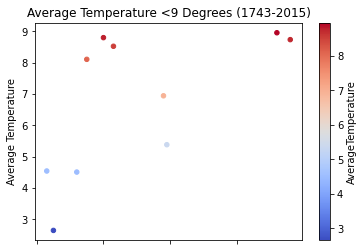

In [64]:
# Average Temperature below 9 degrees
df_nine = dfa[dfa['AverageTemperature'] <= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')
plt.title("Average Temperature <9 Degrees (1743-2015)")
plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.show()

In [71]:
new_co2_df = CO2_df
dfc = pd.DataFrame()

# Collecting all of the unique years
years = CO2_df['Year'].unique()

for i in years:
    df_avg = CO2_df[CO2_df['Year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = (CO2_df[CO2_df['Year'] == i]).head(1)
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc = dfc.append(df_new)
    
# Changing the Year column to year (lowercase)
dfc.rename(index=str, columns={"Year": "year"}, inplace=True)


# Dropping all of the unwanted columns
dfc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

In [72]:
dfc = dfc.dropna()
dfc.head()


,year,Carbon Dioxide (ppm)
2,1958,315.330000
12,1959,315.981667
24,1960,316.908333
36,1961,317.645000
48,1962,318.453333


### Linear Regression Prediction

Text(3.674999999999997, 0.5, 'Carbon Dioxide Emitted in ppm')

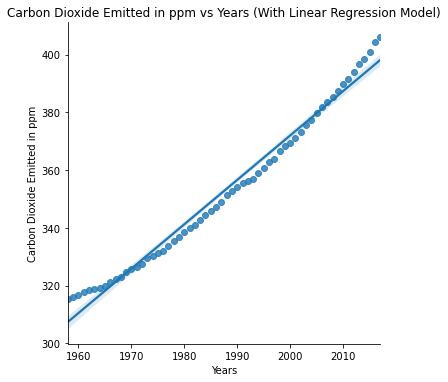

In [73]:
sns.lmplot(x='year', y='Carbon Dioxide (ppm)', data=dfc, order=1)
plt.title('Carbon Dioxide Emitted in ppm vs Years (With Linear Regression Model)')
plt.xlabel('Years')
plt.ylabel('Carbon Dioxide Emitted in ppm')

In [74]:
CO2_df.rename(index=str, columns={"Year": "year"}, inplace=True)

In [75]:
dfsc = pd.merge(dfa, CO2_df, on=['year']).dropna()

dfsc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

### Polynomial Regression Plot (Order = 2)

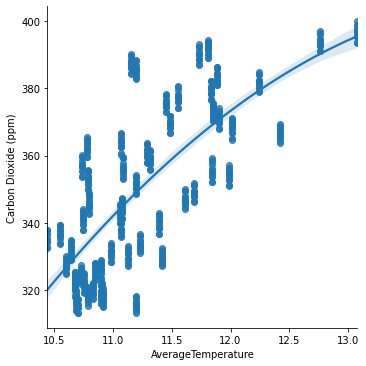

In [76]:
sns.lmplot(x='AverageTemperature', y='Carbon Dioxide (ppm)', data = dfsc,order=2)

In [77]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = CO2_df.groupby(["year"]).mean()["Carbon Dioxide (ppm)"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average CO<sub>2</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(300,420)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="co2-ppm-year")

In [78]:
group2 = CO2_df.groupby(["year", "Month"]).mean()["Carbon Dioxide (ppm)"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in group2.index]

# Mean values.
y1 = group2.values

# Rolling window average
y2 = group2.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
y3 = group2.ewm(span=3, min_periods=1).mean().values

### We use a Rolling average to smooth out smaller fluctuations between months 
### EWMA is for reduced noise and analysing smaller changes

In [79]:
second_trace = go.Scatter(x=x, y=y1, mode="markers", name="Actual value")
third_trace = go.Scatter(x=x, y=y2, line=dict(color="red"), name="Rolling average")
forth_trace = go.Scatter(x=x, y=y3, line=dict(color="green"), name="Exponentially Weighted Moving Average (EWMA)")

default_period = (dt.datetime(2008, 1, 1), dt.datetime(2017,12,1))
default_ppm_range = (380, 410)
layout = go.Layout(
    title="Seasonal fluctations of CO<sub>2</sub> levels in atmosphere",
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))

figure = go.Figure(data=[second_trace, third_trace, forth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-seasonal")

## Polynomial Regression to predict the amount of CO2 per ppm in the atmosphere

In [80]:
from sklearn import linear_model
from sklearn.model_selection  import train_test_split

x_val = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_val = [ i for i in y1 ] 

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", (linearModel.score(x_test, y_test))*100)

# predicted values
pred_value = linearModel.predict(x_val)

Accuracy:  99.60445418458261


In [81]:
# Defining timeline of years
predicted_years = range(1950, 2055)
predicted_months = range(1, 13)

predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        predicted_x.append([y, j, j ** 2, y ** 2])
        
# Predict values
predicted_y = linearModel.predict(predicted_x)


x_plot = [dt.datetime(i[0], i[1], 15) for i in predicted_x]
fifth_trace = go.Scatter(x=x_plot, y=predicted_y, line=dict(color="red"), name="Predicted value")

period_default = dt.datetime(1956, 1, 1), dt.datetime(2050,12,1)
ppm_range_def = (300, 500)
layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_trace, fifth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

In [27]:
# State that had the highest average temperature level
temp_by_state.loc[temp_by_state['AverageTemperature'].idxmax()]

dt                               2012-06-01
AverageTemperature                   36.339
AverageTemperatureUncertainty         0.385
State                                 Delhi
Country                               India
year                                   2012
Name: 116037, dtype: object

In [28]:
# Country that had the highest Average Temperature
# Kuwait (Western Asia)
temp_by_country.loc[temp_by_country['AverageTemperature'].idxmax()]

dt                               2012-07-01
AverageTemperature                   38.842
AverageTemperatureUncertainty         0.464
Country                              Kuwait
Name: 284851, dtype: object

In [29]:
temp_by_state.loc[temp_by_state['AverageTemperatureUncertainty'].idxmax()]

dt                                1768-01-01
AverageTemperature                    -9.102
AverageTemperatureUncertainty         12.646
State                            Kaliningrad
Country                               Russia
year                                    1768
Name: 202908, dtype: object